# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*# Importing our modules

In [1]:
import numpy as np
from datascience import *
import math as m

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


# Examining the Central Limit Theorem

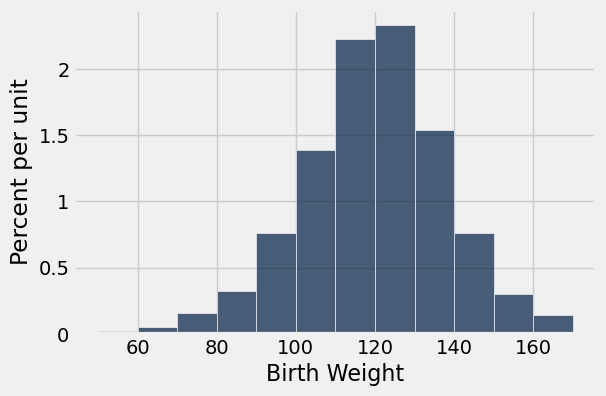

In [4]:
weight_bins = np.arange(50,180,10)
births.hist("Birth Weight",bins=weight_bins)

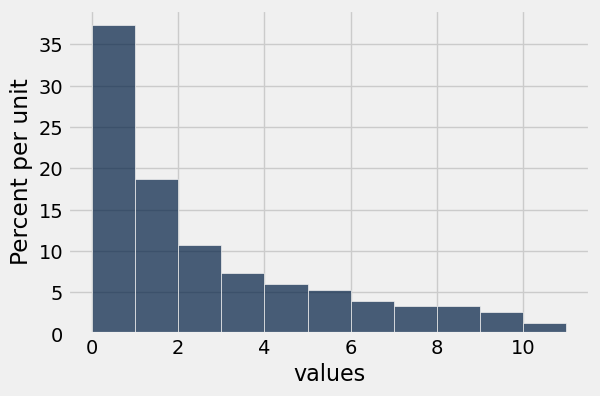

In [5]:
input_values = np.arange(0,15,0.1)
exponential_curve = 0.25*m.e**(0.25*input_values)

r_skew_bins = np.arange(0,12,1)
r_skew_table = Table().with_columns('values',exponential_curve)
r_skew_table.hist(bins=r_skew_bins)

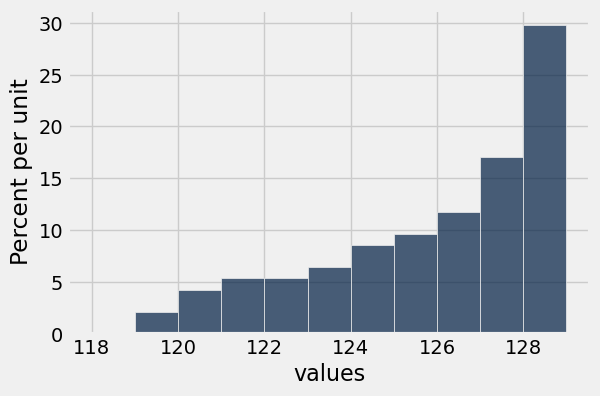

In [6]:
reverse_exponential = 130 - exponential_curve

l_skew_bins = np.arange(118,130,1)
l_skew_table = Table().with_columns('values',reverse_exponential)
l_skew_table.hist(bins = l_skew_bins)

### The Distribution of sample averages

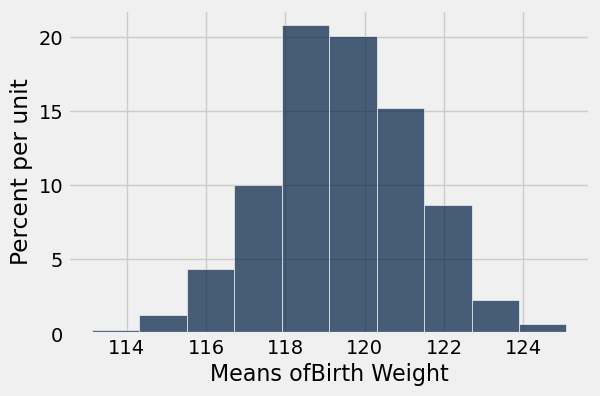

In [12]:
#Let's look at a few columns in the births table 
sample_size = 100
number_of_resamples = 1000
column_name = "Birth Weight"

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = births.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column(column_name))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means of'+column_name,means).hist()    

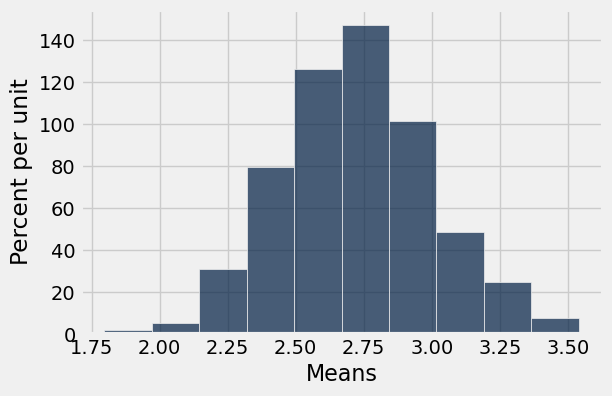

In [8]:
# Let's look at sampling from a right skew distribution
sample_size = 100
number_of_resamples = 1000

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = r_skew_table.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column('values'))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means',means).hist() 

/opt/conda/lib/python3.10/site-packages/datascience/tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


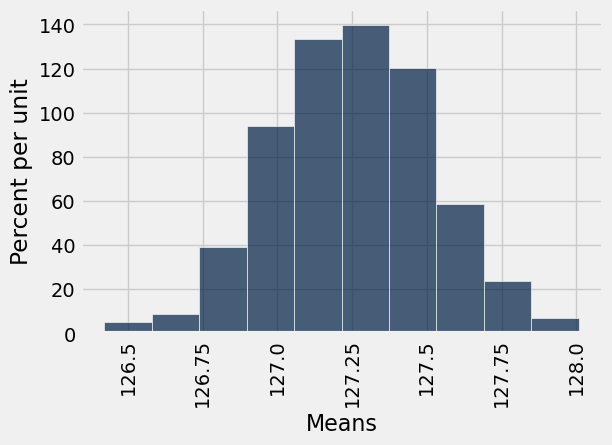

In [9]:
# Let's look at sampling from a left skew distribution
sample_size = 100
number_of_resamples = 1000

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = l_skew_table.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column('values'))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means',means).hist()  

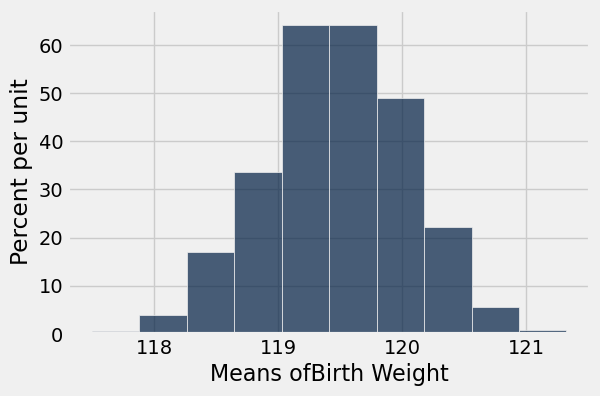

In [10]:
#Let's look at a few columns in the births table, but now with increased sample size
sample_size = 1000
number_of_resamples = 1000
column_name = "Birth Weight"

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = births.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column(column_name))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means of'+column_name,means).hist()   

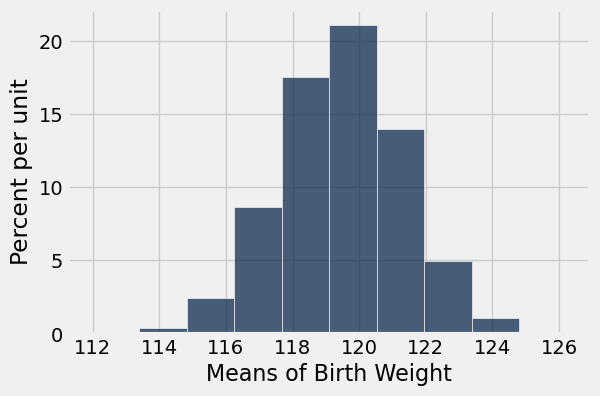

In [14]:
#Let's look at a few columns in the births table, but now with increased number of resamples
sample_size = 100
number_of_resamples = 10000
column_name = "Birth Weight"

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = births.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column(column_name))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means of '+column_name,means).hist()    

# Linear Regression

## Standard Units

In [15]:
birds = Table.read_table('snowy_plover.csv')
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight
28.8,21.84,7.4,5.2
29.04,22.45,7.7,5.4
29.36,22.48,7.9,5.6
30.1,21.71,7.5,5.3
30.17,22.75,8.3,5.9
30.34,22.84,8.5,5.8
30.36,22.5,8.2,5.8
30.46,22.72,8.3,6
30.54,23.31,9,6.1
30.62,22.94,8.5,6.2


Let's take a look at the relationship between Egg Weight and Bird Weight

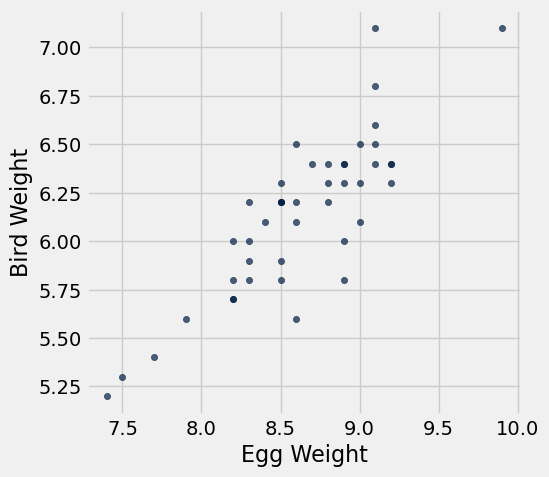

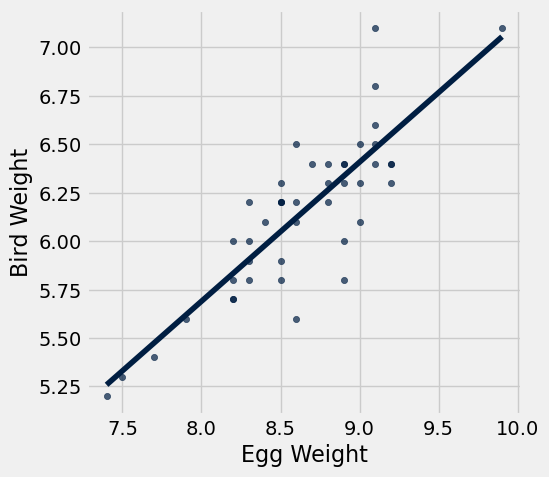

In [23]:
birds.scatter('Egg Weight','Bird Weight')
birds.scatter('Egg Weight','Bird Weight',fit_line=True)

Now let's calculate the standard units for each weight variable:

In [18]:
e_weight_standard_units = (birds.column('Egg Weight') - np.average(birds.column('Egg Weight'))) / np.std(birds.column('Egg Weight'))
e_weight_standard_units

array([-2.57850339, -1.95168489, -1.53380588, -2.36956389, -0.69804788,
       -0.28016888, -0.90698738, -0.69804788,  0.76452863, -0.28016888,
       -0.07122938, -0.90698738, -0.69804788,  0.13771013, -0.28016888,
       -0.48910838, -0.28016888,  0.55558913,  0.97346813,  0.55558913,
       -0.07122938, -0.28016888,  0.34664963, -0.69804788, -0.90698738,
       -0.90698738,  0.55558913, -0.28016888,  0.34664963, -0.07122938,
        0.97346813,  0.76452863,  0.55558913,  1.18240763,  0.97346813,
       -0.07122938,  0.34664963,  0.97346813,  1.18240763,  1.18240763,
        0.55558913,  0.97346813,  2.64498414,  0.76452863])

In [20]:
b_weight_standard_units = (birds.column('Bird Weight') - np.average(birds.column('Bird Weight'))) / np.std(birds.column('Bird Weight'))
b_weight_standard_units

array([-2.32929889, -1.83656258, -1.34382628, -2.08293074, -0.60472183,
       -0.85108998, -0.85108998, -0.35835368, -0.11198552,  0.13438263,
        0.87348708, -1.09745813,  0.13438263,  0.62711893,  0.13438263,
       -0.11198552,  0.38075078,  0.38075078,  0.87348708, -0.35835368,
       -1.34382628,  0.13438263,  0.38075078, -0.85108998, -1.09745813,
       -0.35835368,  0.62711893, -0.60472183,  0.62711893,  0.13438263,
        2.35169599,  0.87348708, -0.85108998,  0.62711893,  0.62711893,
       -0.11198552,  0.13438263,  1.61259154,  0.38075078,  0.62711893,
        0.62711893,  1.11985523,  2.35169599,  0.38075078])

In [21]:
# to simplify, let's turn this process into a function
def standard_units_convert(input_data):
    standard_unit = (input_data - np.average(input_data)) / np.std(input_data)
    return standard_unit

In [22]:
standard_units_convert(birds.column('Bird Weight')) == b_weight_standard_units

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

## Correlation Coefficient `r`

In [25]:
correlation_r = np.mean(b_weight_standard_units*e_weight_standard_units)
correlation_r

0.84722752951013713

In [26]:
def calculate_r(x_value_array, y_value_array):
    ...
    return  np.mean(standard_units_convert(x_value_array)*standard_units_convert(y_value_array))

In [27]:
calculate_r(birds.column('Egg Weight'),birds.column('Bird Weight'))

0.84722752951013713

In [28]:
calculate_r(birds.column('Egg Weight'),birds.column('Egg Length'))

0.79244922496849057

## Linear Regression (Slope and Intercept)

In [29]:
# finding the standard deviations for our x-value & y-value arrays
x_val_sd = np.std(birds.column('Egg Weight'))
y_val_sd = np.std(birds.column('Bird Weight'))
print(correlation_r, x_val_sd, y_val_sd)

0.84722752951 0.478607441067 0.405896619986


In [31]:
slope_of_regression = correlation_r * (y_val_sd/x_val_sd)
slope_of_regression

0.7185153448936793

In [33]:
#finding the means for our x-value & y-value arrays
x_val_mean = np.mean(birds.column('Egg Weight'))
y_val_mean = np.mean(birds.column('Bird Weight'))
print(slope_of_regression, x_val_mean, y_val_mean)

0.718515344894 8.63409090909 6.14545454545


In [35]:
intercept = y_val_mean - slope_of_regression*x_val_mean
intercept

-0.058272261934288139

In [36]:
x_val_array = birds.column('Egg Weight')
y_estimates_array = intercept + slope_of_regression*x_val_array
birds = birds.with_columns('Estimates',y_estimates_array)
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight,Estimates
28.8,21.84,7.4,5.2,5.25874
29.04,22.45,7.7,5.4,5.4743
29.36,22.48,7.9,5.6,5.618
30.1,21.71,7.5,5.3,5.33059
30.17,22.75,8.3,5.9,5.90541
30.34,22.84,8.5,5.8,6.04911
30.36,22.5,8.2,5.8,5.83355
30.46,22.72,8.3,6,5.90541
30.54,23.31,9,6.1,6.40837
30.62,22.94,8.5,6.2,6.04911


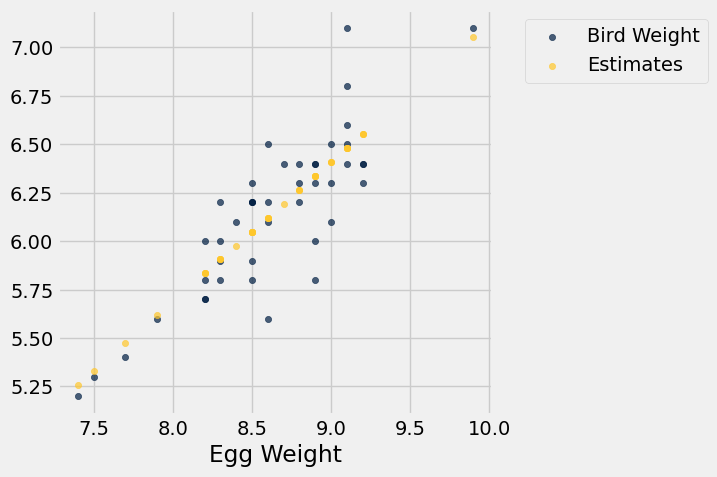

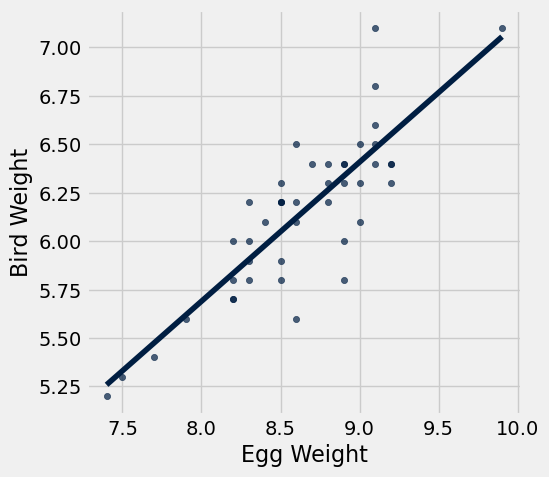

In [37]:
birds.select('Egg Weight','Bird Weight','Estimates').scatter('Egg Weight')
birds.scatter('Egg Weight','Bird Weight',fit_line=True)

## The Residual - Evaluating your Linear Regression Accuracy

In [38]:
residual = y_estimates_array - birds.column('Bird Weight')
residual

array([ 0.05874129,  0.07429589,  0.01799896,  0.03059282,  0.0054051 ,
        0.24910817,  0.03355357, -0.0945949 ,  0.30836584, -0.15089183,
       -0.3790403 ,  0.13355357, -0.2945949 , -0.20718876, -0.15089183,
       -0.12274336, -0.25089183,  0.03651431, -0.01978262,  0.33651431,
        0.5209597 , -0.15089183, -0.03533723,  0.1054051 ,  0.13355357,
       -0.16644643, -0.06348569,  0.14910817, -0.13533723, -0.0790403 ,
       -0.61978262, -0.09163416,  0.53651431,  0.15206891,  0.08021738,
        0.0209597 ,  0.06466277, -0.31978262,  0.25206891,  0.15206891,
       -0.06348569, -0.11978262, -0.04497035,  0.10836584])

In [39]:
birds = birds.with_columns('Residual',residual)
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight,Estimates,Residual
28.8,21.84,7.4,5.2,5.25874,0.0587413
29.04,22.45,7.7,5.4,5.4743,0.0742959
29.36,22.48,7.9,5.6,5.618,0.017999
30.1,21.71,7.5,5.3,5.33059,0.0305928
30.17,22.75,8.3,5.9,5.90541,0.0054051
30.34,22.84,8.5,5.8,6.04911,0.249108
30.36,22.5,8.2,5.8,5.83355,0.0335536
30.46,22.72,8.3,6,5.90541,-0.0945949
30.54,23.31,9,6.1,6.40837,0.308366
30.62,22.94,8.5,6.2,6.04911,-0.150892


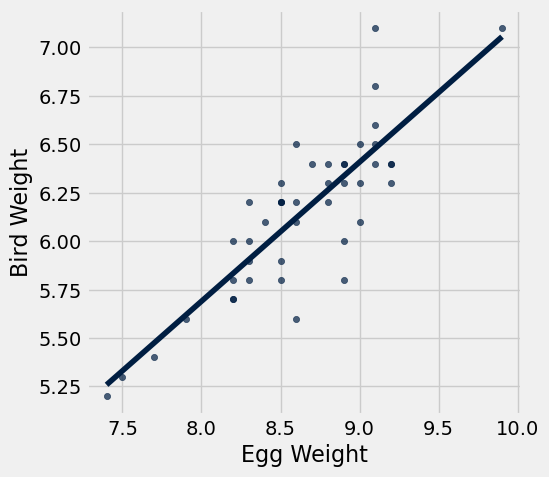

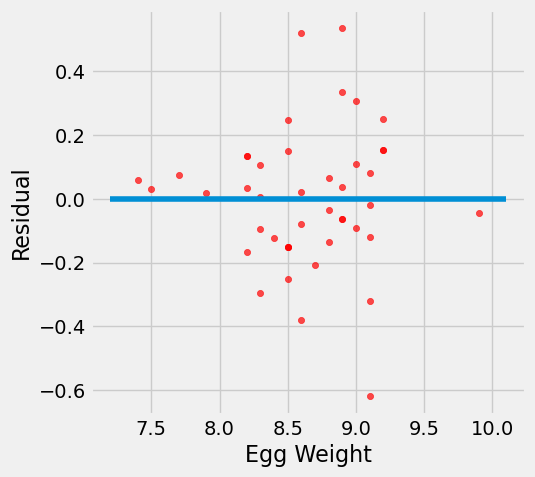

In [40]:
birds.scatter('Egg Weight','Bird Weight',fit_line=True)
birds.scatter('Egg Weight','Residual',color = 'r')
plt.plot(make_array(min(birds.column('Egg Weight'))-.2,max(birds.column('Egg Weight'))+.2), np.zeros(2))